# Problem set 2: Schwarzschild geodesics

In [6]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import ode

**Hint:** This is how you define a function:

In [7]:
def square(x, a):
    return a * x**2

In [8]:
def V_eff(r, L, kappa):
    return 1/2*(1 - 2/r)*(kappa + L**2/r**2)

In [12]:
def V_eff_deriv(r, L, kappa=1):
    return (r**2 - r*L**2 + 3*L**2)/(r**4)

Using the expression we obtained at 2.1 (a), we find that $r = \frac{1}{2}L(L\pm\sqrt{L^2-12})$

In [16]:
 def r_orbit (L, sign):
        return 0.5*L*(L+sign*math.sqrt(L**2-12))
        

**Hint:** This is how you can plot a function:

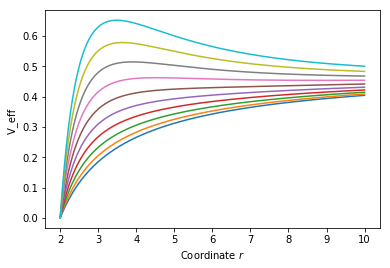

In [21]:
# Generate 100 numbers between 0 and 10 for the x-axis of the plot
r_space = np.linspace(start=2, stop=10, num=300)
# Make a list of a few values of `a` to plot
L_list = np.linspace(start=1, stop=5, num=10)

for L in L_list:
    plt.plot(r_space, V_eff(r_space, L, kappa=1))

# Limit the axes to these ranges
#plt.ylim(0, 310)
#plt.xlim(-10, 10)
# Add axis labels
plt.xlabel(r'Coordinate $r$')
plt.ylabel(r'V_eff ');

**Hint**: This is how you can integrate a coupled system of ODEs $\dot{\vec{x}}(\tau,\vec{x})$, where $\vec{x}$ is a collection of variables like $\vec{x}=(r,s,\ldots)$.

In [4]:
def r_dot(tau, x, a):
    r = x[0] # `r` is the first variable in `x`
    s = x[1] # `s` is the second variable in `s`
    return r * s + a

def s_dot(tau, x, a):
    r, s = x # This is a faster way to unpack the variables in `x`
    return r + a * s

def integrate_something(r0, s0, a, step):
    # Set up lists to store the values of the integration variable `tau`
    # and the integrated values `x(tau)=[r(tau), s(tau)]`.
    # Initially, they contain only the initial values `tau_0` and `[r_0, s_0]`.
    tau_history = [ 0. ]
    x_history = [ [r0, s0] ]
    # Set up the integration. The `lambda` function returns `x_dot` as a list `[r_dot, s_dot, ...]`.
    x = ode(lambda tau, x: [
        r_dot(tau, x, a),
        s_dot(tau, x, a),
    ]).set_integrator('zvode', method='bdf').set_initial_value(x_history[0], tau_history[0])
    # Integrate while these conditions are met. We stop when `r` exceeds `3 * r0`
    # or when `s` exceeds `10`.
    while x.successful() and x_history[-1][0] < 3 * r0 and x_history[-1][1] < 10:
        x_history.append(x.integrate(x.t + step))
        tau_history.append(x.t)
    # Return the history as Numpy arrays, instead of simple lists, so that we can do slicing
    return np.asarray(tau_history), np.asarray(x_history)

In [5]:
# Perform the integration
r0 = 1
s0 = 0
tau, x = integrate_something(r0=r0, s0=s0, a=3, step=0.02)

**Hint**: If the it takes too long, you can stop a running simulation by selecting `Kernel > Interrupt Kernel` in the menu bar above, or typing `Esc, I, I`. Adjust the integration step to make sure the simulation finishes in a reasonable time.

C:\Users\Bogdan\Anaconda3\lib\site-packages\numpy\core\numeric.py:501: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


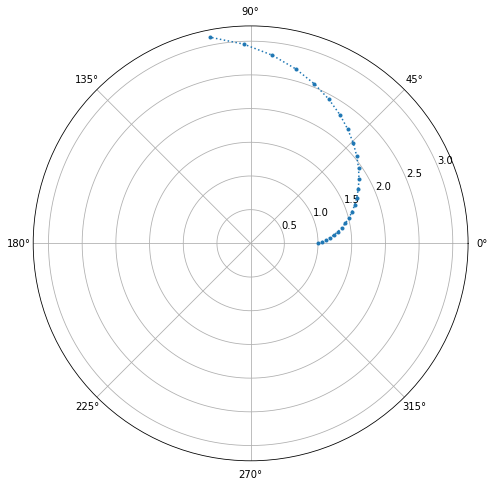

In [6]:
# Plot the results. You can retrieve the history of a particular
# variable by "slicing" the array `x`. For example, `x[:,0]`
# selects all rows of the array, but only the first value of each
# row. This corresponds to all values of the variable `r`.
# We make a polar plot here by treating `s` as an angle (in radians) and
# `r` as the radius corresponding to that angle.
plt.figure(figsize=(8, 8))
plt.polar(x[:,1], x[:,0], marker='.', ls='dotted');